# Exploratory Data Analysis


Over the past year and a half, I've worked in the industry and in academia. My introduction to exploratory data analysis began while writing my bachelor thesis in January 2015 where I worked at an electro-mobility firm in Germany trying to investigate how energy storage designs can be optimized. A 'good design' was one that affected the KPIs positively and these KPIs were often a proxy for the overall business metric of the manufacturing plant. 

Besides peforming simulations, questions I was being asked everyday went something like this:

1. How are attributes (features) X1, X2, X3, X4 ... XN distributed?
2. How does the response Y behave when conditioned by attribute X1? 
3. Is there an underlying pattern to the outliers? 
4. What are the interactions or correlations between attributes pairs? 
5. Which are the most contributing attributes?
6. If certain attributes are set to their mean-value, how does the relationship between the most contributing attributes and the response look like? This is also knowing as *'adjusting the response'*. 

## Data is often messy due a number of reasons

Fastforward to today, I've been doing energy analytics at IIT Bombay, INDIA. My job mainly requires me to work with Internet-of-Things (IoT) systems and sensor data (smart-meters).  A **sensor is a data collector**  that monitors the environment and records certain measurements. A simple example would be a luminosity sensor, it measures light intensity that hits its surface and logs these measurements in a file or a database. This data is logged into databases (MongoDB or MySQL) at frequencies of the order of milli-seconds. Anyone who has worked ground-up with sensors, will know that **sensor data is extremely messy**. This 'messiness'can creep in due to various reasons - hardware malfunctioning, data-logging errors, anamolies etc. Problems become worse when you want to fuse data from various sensors (sources) and there is a disparity between their timestamps. 

## Why Exploratory Data Analysis?

In such cases, it is often imperative to perform exloratory analysis to understand what's going on in the underlying process that generates the data. The following excerpt from <cite> “Doing Data Science” by Rachel Schutt and Cathy O’Neil <cite> articulates this necessity very lucidly - 

*"As much as Exploratory Data Analysis (EDA) is a set of tools, it is also a mindset. And that mindset is about your relationship with the data. You want to understand the data-gain intuition, understand the shape of it and try to connect your understanding of the process that generated the data to the data itself. EDA happens between you and the data and isn't about proving anything to anyone else”* 

**TL;DR** before building ANY machine learning model its a great habit to perform EDA and build some intuition. It can help you to -

* Visualize the shape of the data.
* How the response variable behaves when conditioned by a feature. 
* Identify correlations between features.
* Performing sanity checks on your resultant machine learning model and troubleshoot errors.
* Assess the scale and direction of the relationship between features and outcome variables

## Let's get our hands dirty: UCI Bank Marketing Dataset

The [data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 

**The output is the conversion metric:** whether a customer signed up for the bank product. 

**Type of problem:** Basically, it is a **binary classification problem**.

### Why this dataset? 

**Firstly**, because I am personally interested to see how data can be analyzed to **build data products that influence business decisions**. For example in marketing, competition and budget constraints demand that the teams invest on highly refined and directed campaigns that maximize their Return On Investment. It is especially interesting for me to see how insights pulled from data can be used to improve these campaigns. This isn't very different from  how analytics is used to optimize the design of IoT systems before scaling up but more on that later.

**Secondly**, the dataset is **intuitive and requires little domain knowledge**. I've personally found that the quickest way to learn is by picking up a dataset that contains interpretable features (social and economic) so that you have build some intuition while building models and still stay connected to the overall business problem/metric. 


I will adopt a **question and answer style through this exercise**; a **high-level business question** and **answer in the form of a plot or a graph**.

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn import preprocessing
from __future__ import division
sns.set(style="darkgrid")
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
% matplotlib inline

In [116]:
data = pd.read_csv('../bank/bank.csv', sep=';')
data_labels = pd.Series([0 if x == 'no' else 1 for x in data.ix[:,-1]])
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Exploration

Above, we can see there are many interpretable social features like age, contact details, marital status etc. 

**QUESTION: Was the campaign targeted towards a particular range of age? How did the differenly aged people convert or sign up for the product?** 

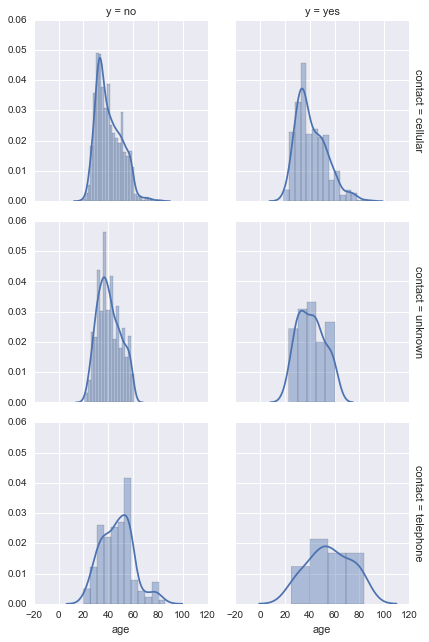

In [71]:
g = sns.FacetGrid(data, row="contact", col="y", margin_titles=True)
g.map(sns.distplot, "age")

**ANSWER:** The **campaign wasn't specifically targetted** towards any specific age group. Let's have a look at the overall distribution of age-class to make this clearer. 

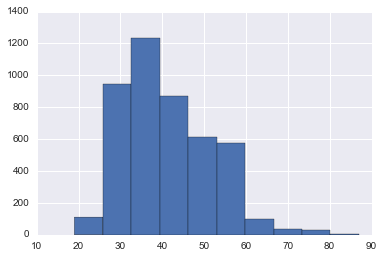

In [72]:
data.age.hist()

**QUESTION: How are the jobs distributed in the customer base?**  

In [73]:
print 'Different categories of jobs\n'
print data.job.value_counts()

Different categories of jobs

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
dtype: int64


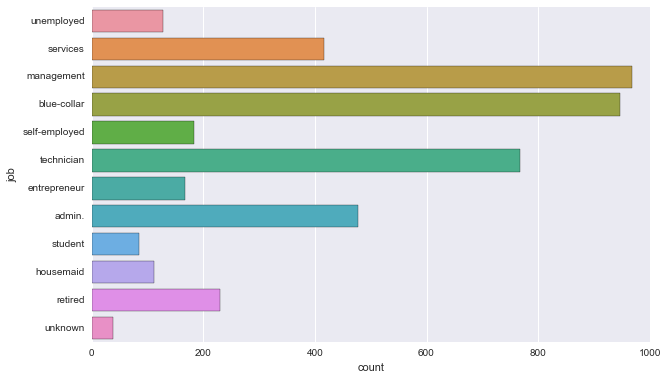

In [74]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
sns.countplot(y=data.job)

**Answer: ** Seems like the majority of the customers where corporate blue-collar workers, management officials and technicians. Let's see how these majority classes converted.

**QUESTION: How succesfully were the blue-collar workers, management workers and technicians converted to buy the product?**

Proportion of population doing majority jobs 0.593452775935


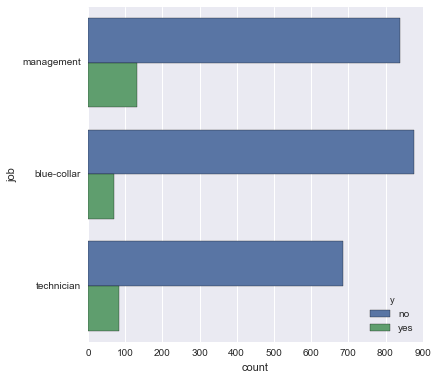

In [75]:
pylab.rcParams['figure.figsize'] = (6.0, 6.0)
majority_jobs = data[(data.job == 'management') | (data.job == 'technician') | (data.job == 'blue-collar')]
print 'Proportion of population doing majority jobs', len(majority_jobs)/ (data.shape[0])
sns.countplot(y=majority_jobs.job, hue=majority_jobs.y)

**ANSWER:** As can be seen from the above graph, management workers seemed to be more interested in buying the product whereas blue-collar workers were more hesistant. Another insight is that **there seems to be a class imbalance**. These majority jobs represent 60% of the customers and there seems to be a class imbalance which can also be confirmed by making a histrogram of column y. Such class imbalances can severely affect our classification algorithm/model. More on how to handle class imbalance problems later.

### Conditional Probability distributions: Response conditioned by categorical features.

This is an important step to determine if a particular feature has a predictive power. Earlier we deduced that the advertising campaign wasn't specifically targetted towards a specific age class. But now we want to answer:

**QUESTION: What influence did age have in the decision of buying a product?**
This can be answered by making boxplots. 

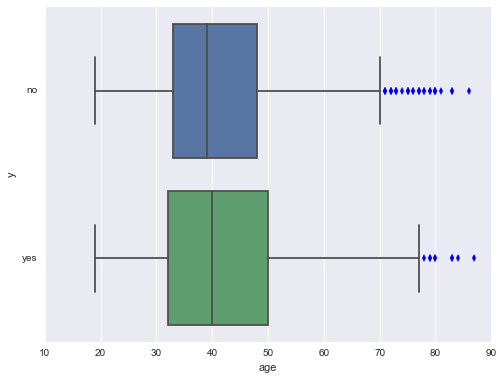

In [76]:
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
sns.boxplot(y=data['y'], x=data['age'])

**ANSWER:** Amongst people who bought the product (y=yes) **a larger proportion of people were above 40 years in age**. For the sake of brevity, I will also plot a kernel density estimate plot. 

#### KDE Plots

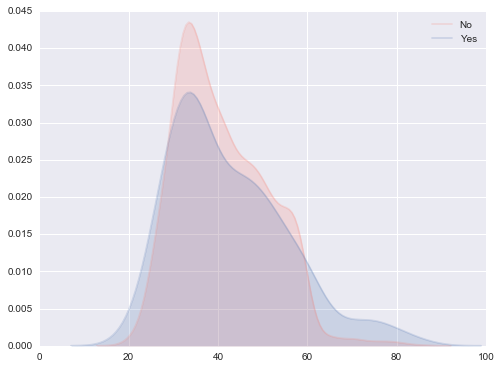

In [77]:
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
sns.kdeplot(data[(data['y'] == 'no')].age, shade=True, alpha=.2, label='No', color = 'salmon')
sns.kdeplot(data[(data['y'] == 'yes')].age, shade=True, alpha=.2, label='Yes')
plt.show()

There you go, much more clearer. The KDE plot has a wider tail.

### 2. Correlations!

Phew finally we have a feel of how different attributes of the sample (or the population) influence their behaviour of buying the product. 

#### Feature-Response Correlations


In [81]:
#data['loan'] = data.loan.apply(lambda x: 1 if (x == 'yes') else 0)
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


## Preprocessing and Dimensionality Reduction

Finally, I wish to perform some dimensionality reduction. I will be applying principal component analysis for the same.

*Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the analysis of gene expression data, and many more.*

But there is a slight problem here since we have categorical and numerical data. The first step for PCA is to form a covariance or the correlation matrix for the entire feature space. The strength of correlation between any pair of variables is expressed by covariance and a correlation coefficient for numerical data. 

But we have a non-numeric or categorical features like housing, loan, contact, education and so on. To apply PCA, I will use dummy encoding to transform categorical features to numerical features.

### Dummy Encoding: Converting categorical features to numerical features.


In [175]:
clean_data = data.copy()
print clean_data.columns
clean_data.head(5)


Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'y'], dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [176]:
cat_cols = [1, 2, 3, 4, 6, 7, 8, 9,10,14,15]
cat_data = clean_data.iloc[:,cat_cols]
cat_data.head(5)

,job,marital,education,default,housing,loan,contact,day,month,previous,poutcome
0,unemployed,married,primary,no,no,no,cellular,19,oct,0,unknown
1,services,married,secondary,no,yes,yes,cellular,11,may,4,failure
2,management,single,tertiary,no,yes,no,cellular,16,apr,1,failure
3,management,married,tertiary,no,yes,yes,unknown,3,jun,0,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,5,may,0,unknown


Nice! We have all the categorical features in our dataframe *cat_data*. We will now apply dummy coding to each feature of this dataframe and join/merge this transformed dataframe back to our original dataframe.

In [177]:
dummy_cat = pd.get_dummies(cat_data)
print dummy_cat.shape
dummy_cat.head(5)

(4521, 46)


,day,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,11,4,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,16,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


A total of 46 features from 10 categorical features! 

In [178]:
clean_data.drop(clean_data.columns[cat_cols], axis=1, inplace=True)
clean_data = clean_data.merge(dummy_cat, how='inner',left_index=True, right_index=True, copy=False)
clean_data.head(5)

,age,balance,duration,campaign,pdays,y,day,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,no,19,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,220,1,339,no,11,4,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,185,1,330,no,16,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,199,4,-1,no,3,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,no,5,0,0,1,...,0,0,1,0,0,0,0,0,0,1


Looks good! Now time to standardize the numerical features. 

### Standardization of the remaining numerical features

Standaridization is important to make sure we don't have overwhelming contributions of any variable due to scale.

In [180]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [0,11,12,13,16,17,18,19]
data_to_scale = clean_data.iloc[:, numeric_cols].astype(np.float)  # change int to float
clean_data.drop('y', axis=1, inplace=True)
scaler = preprocessing.StandardScaler().fit(data_to_scale)
clean_data.iloc[:, numeric_cols] = scaler.transform(data_to_scale)
clean_data.head(5)

,age,balance,duration,campaign,pdays,day,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,1787,79,1,-1,19,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.772583,4789,220,1,339,11,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.583458,1350,185,1,330,16,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.056270,1476,199,4,-1,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1.686036,0,226,1,-1,5,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Principal Component Analysis

In [181]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

labels = pd.Series([0 if x == 'no' else 1 for x in data.ix[:,-1]])
#clean_data.drop('y', axis=1, inplace=True)
X = clean_data.values
y = labels.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [260]:
pca = PCA(n_components=5)
pca.fit_transform(clean_data.values)
#pca_df = pd.DataFrame(pca.components_, columns=clean_data.columns,index = ['PC-1','PC-2'])
#np.sort(np.abs(pca_df.max(axis=0)))

array([[  3.64585506e+02,  -1.84648858e+02,  -4.00210576e+01,
          2.49976465e+00,  -2.23634221e+00],
       [  3.36649391e+03,  -3.78625657e+01,   2.98414385e+02,
         -2.59883566e+00,  -7.64922347e-01],
       [ -7.24569264e+01,  -7.76755455e+01,   2.90619253e+02,
          2.22424105e+00,  -1.12012836e+00],
       ..., 
       [ -1.12751290e+03,  -1.14726603e+02,  -3.99147812e+01,
          3.18269207e+00,   7.78740929e+00],
       [ -2.85416255e+02,  -1.34531730e+02,   1.72053509e+02,
         -8.56735562e+00,   2.15422724e+00],
       [ -2.86703814e+02,   8.16498743e+01,   2.09087219e+02,
         -1.12152498e+01,   5.80300940e-01]])